In [1]:
import numpy as np
import pandas as pd

This is a template for your final project. 

In [11]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

### Answer
In this dataset there are several features, that can be used as a target variable to measure success of the movies. In terms of money success, we have two features:
- usa_gross_income
- worldwide_gross_income
In terms of audience success, there are one feature that  we can use => avg_vote.
To make a choice, let's compare number of NaN observations of each feature

In [11]:
print("The number of empty observations in avg_vote:", avg_vote_nan:=len(full_dataset[full_dataset['avg_vote'].isna()]), f"or {avg_vote_nan / len(full_dataset) * 100}%")
print("The number of empty observations in usa_gross_income", usa_income_nan:=len(full_dataset[full_dataset['usa_gross_income'].isna()]), f"or {usa_income_nan / len(full_dataset) * 100}%")
print("The number of empty observations in worldwide_gross_income", worldwide_nan:=len(full_dataset[full_dataset['worlwide_gross_income'].isna()]), f"or {worldwide_nan / len(full_dataset)* 100}%")

The number of empty observations in avg_vote: 0 or 0.0%
The number of empty observations in usa_gross_income 48306 or 80.24519087012858%
The number of empty observations in worldwide_gross_income 41062 or 68.21156849064754%


As we can see, number of empty values of usa_gross_income and worldwide_gross_income is quite large, and we can't make good predictions, with using them as target variables, since we can use for train dataset only about 20-30% percent of all data.
**So, the most optimal target variable for this task is: avg_vote**

In [8]:
full_dataset.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,60198.000000,60198.000000,60198.000000,6.019800e+04,8812.000000,56129.000000,51969.000000
mean,1985.308366,99.744825,5.997349,1.049150e+04,55.532229,44.926901,27.269872
std,23.308107,22.753228,1.199483,5.686771e+04,17.885123,152.973352,55.689940
min,1906.000000,40.000000,1.000000,1.000000e+02,1.000000,1.000000,1.000000
25%,1970.000000,88.000000,5.400000,2.060000e+02,43.000000,4.000000,3.000000
50%,1992.000000,95.000000,6.200000,5.030000e+02,56.000000,10.000000,8.000000
75%,2005.000000,107.000000,6.800000,2.000000e+03,68.000000,28.000000,24.000000
max,2019.000000,729.000000,10.000000,2.159628e+06,100.000000,7029.000000,837.000000


But, can we assume that success of the movie is based only on average score? We don't have many information about income, but we can measure popularity based on number reviews for each film. Let's see the avg distribution of score, compared to number of reviews.

In [5]:
import seaborn as sns

<Axes: xlabel='None', ylabel='avg_vote'>

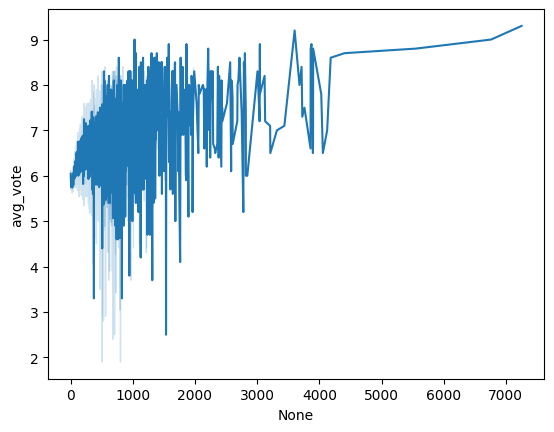

In [7]:
sns.lineplot(full_dataset, x=full_dataset['reviews_from_critics'] + full_dataset['reviews_from_users'], y=full_dataset['avg_vote'])

Well, as we can see there are some correlation between avg_vote and number of reviews, but seems like it's not linear. Let's build up a correlation matrix of avg_vote, reviews_from_users, reviews_from_critics:

In [4]:
full_dataset[['avg_vote', 'reviews_from_users', 'reviews_from_critics']].corr()

,avg_vote,reviews_from_users,reviews_from_critics
avg_vote,1.000000,0.154373,0.195530
reviews_from_users,0.154373,1.000000,0.725157
reviews_from_critics,0.195530,0.725157,1.000000


This matrix tells us, that there is actually low correlation between avg_vote and reviews. But, it seems like number reviews from user and critics are highly correlated with each. So instead of using each feature separatly, it's much more convinient to combine them in on common feature *reviews*.

1.2 Explain which task are you going to solve (is it a regression, classification or something else)?

## Answer
This is a regression task, where algorithm will try to estimate avg_vote as numerical value. It can be actually changed, to somewhat categorical predictions, where we can create scale like:
- 0-3: bad film
- 4-6: avg film
- 7-8: good film
- 9-10: awesome film
And in this case  overall performance will be better, but this classification is out of the task, and sometimes precise values can be more interesting rather than split in this categories.

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it.

There are several metrics for Regression task:
- MSE
- RMSE
- MAE
Since our value is not oscillating much (in range 0-10), so scale of "punishing" for small and large error can be the same, it's better to use *Mean-Absolute Error* in this case. But,
it should be noted that this metrics will be used in overall evaluation of results of regressor, because every different model uses their **Loss functions** for training and error reduction. For example, Linear Regression can use all three (MSE, RMSE, MAE). Logistic Regression uses *Log Loss error* function, and *Trees* uses Log-Loss and *Entropy* to measure error.

In [15]:
from sklearn.metrics import mean_absolute_error

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_dataset.drop('avg_vote', axis=1), full_dataset['avg_vote'],
                                                    test_size=0.3, random_state=451)

2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


## Reviews

Firslty, let's create a new variable *review* (1.1) from *reviews_from_users* and *reviews_from_critics*

In [23]:
X_train['reviews'], X_test['reviews'] = X_train['reviews_from_users'] + X_train['reviews_from_critics'], \
    X_test['reviews_from_users'] + X_test['reviews_from_critics']
X_train = X_train.drop(['reviews_from_users', 'reviews_from_critics'], axis=1)
X_test = X_test.drop(['reviews_from_users', 'reviews_from_critics'], axis=1)

In [30]:
X_train.head()

,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews
21735,Bullies,1986,1986-08-29,"Action, Thriller, Drama",96,Canada,English,Paul Lynch,"John Sheppard, Bryan McCann",Simcom Limited,"Jonathan Crombie, Janet-Laine Green, Stephen H...",When the peaceful Morris family move to a smal...,399,CAD 1800000,$ 2995527,$ 2995527,NaN,19.0
46279,Evil Behind You,2006,2006-10-31,"Action, Comedy, Sci-Fi",90,USA,English,"Jim Carroll, Jason Kerr",Jim Carroll,Given the Boot Productions,"Hilary Kennedy, Manuel Velazquez, D.C. Lee, Ji...",Abducted couples are victims of medical experi...,584,$ 200000,NaN,NaN,NaN,19.0
58637,Legend of Hell,2012,2012-02-04,"Action, Horror, Mystery",85,Germany,English,Olaf Ittenbach,Olaf Ittenbach,Europlay,"Karen Breece, Wayne Darrin, Martina Ittenbach,...",An archaeologist discovers an ancient artifact...,211,EUR 850,NaN,NaN,NaN,7.0
21106,Basic Training,1985,1985-11-01,Comedy,88,USA,English,Andrew Sugerman,Bernie Kahn,Entertainment Events,"Ann Dusenberry, Rhonda Shear, Angela Aames, Wi...",Melinda comes to Washington DC to visit her fr...,342,NaN,NaN,NaN,NaN,11.0
11733,How to Stuff a Wild Bikini,1965,1965-07-14,"Comedy, Musical",93,USA,"English, Italian, German, French",William Asher,"William Asher, Leo Townsend",Alta Vista Productions,"Annette Funicello, Dwayne Hickman, Brian Donle...","Frankie, on naval-reserve duty in Tahiti, does...",1101,NaN,NaN,NaN,NaN,39.0


## Title

An for obvious part, we can drop **imdb_title_id** since there is not useful information.

In [25]:
X_train = X_train.drop('imdb_title_id', axis=1)
X_test = X_test.drop('imdb_title_id', axis=1)

Let's examine, how different features **title** and **original_title**:

In [28]:
print("Number of obs. where title equal to original:", title:=len(X_train[X_train['title'] == X_train['original_title']]), f"or {title / len(X_train) * 100}%")
print("Number of NaN in title:", len(X_train[X_train['title'].isna()]))
print("Number of NaN in original title:", len(X_train[X_train['original_title'].isna()]))

Number of obs. where title equal to original: 42046 or 99.78166975176799%
Number of NaN in title: 0
Number of NaN in original title: 0


So, as we can see, this 2 columns are almost identical to each other, so we can drop one of them.

In [29]:
X_train = X_train.drop('original_title', axis=1)
X_test = X_test.drop('original_title', axis=1)

Feature **title** can't be used directly, since it is highly variate, and in encoding it will produce thousands of features. But, to train the model, we can use 10 most frequent words (except stop words) to use as a feature in our model. Let's plot the barplot of words count:

In [43]:
word_title_count = full_dataset['title'].str.split(expand=True).stack().value_counts()

In [58]:
stop_words = ['The', 'of', 'the', 'in', 'de', 'La', 'and', 'a', 'to', 'A', 'Le', '-', 'la', '&', 'di', 'El', 'My', 'Les', 'for', 'on', 'no', 'il', 'del']
popular_title_10 = word_title_count[~word_title_count.index.isin(stop_words)][:10]

In [77]:
filtered_data = full_dataset[full_dataset['title'].str.split().apply(lambda x: any(word in popular_title_10 for word in x))]

Let's make a barplot, with respect to avg of vote:

<Axes: xlabel='avg_vote', ylabel='count'>

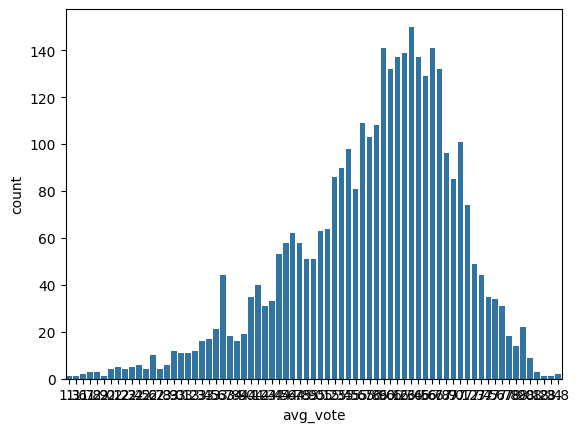

In [78]:
sns.countplot(filtered_data, x=filtered_data['avg_vote'])

As we can see, avg_vote is close to normal, with such filtration, and a slight shift towards high score. It's good to use this, to encode our variables.

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

In [81]:
class TitleEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = ['The', 'of', 'the', 'in', 'de', 'La', 'and', 'a', 'to', 'A', 'Le', '-', 'la', '&', 'di', 'El', 'My', 'Les', 'for', 'on', 'no', 'il', 'del']

    def fit(self, X, y=None):
        assert X['title'].isna().sum() == 0, 'There are missing values in the title'

        word_count = X['title'].str.split(expand=True).stack().value_counts()
        self.top_10 = word_count[~word_count.index.isin(self.stop_words)][:10]
        return self

    def transform(self, X: pd.DataFrame, y=None):
        X = X.copy()

        for word in self.top_10:
            X[word + '_title'] = X[X['title'].str.split().isin(word)].astype(int)
        return X.values

## Age and Date

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

3.2 Use cross-validation to compare models and select best set of hyperparameters

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?